# Додаткові завдання №2

## 1 Візуалізація емпіричної імовірності
Побудуйте графік залежності емпіричної імовірності випадіння герба (HEAD) від кількості підкидань чесної монети (симуляцій).

**Зауваження.** Завдання передбачає використання бібліотеки [Matplotlib](https://matplotlib.org/).

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

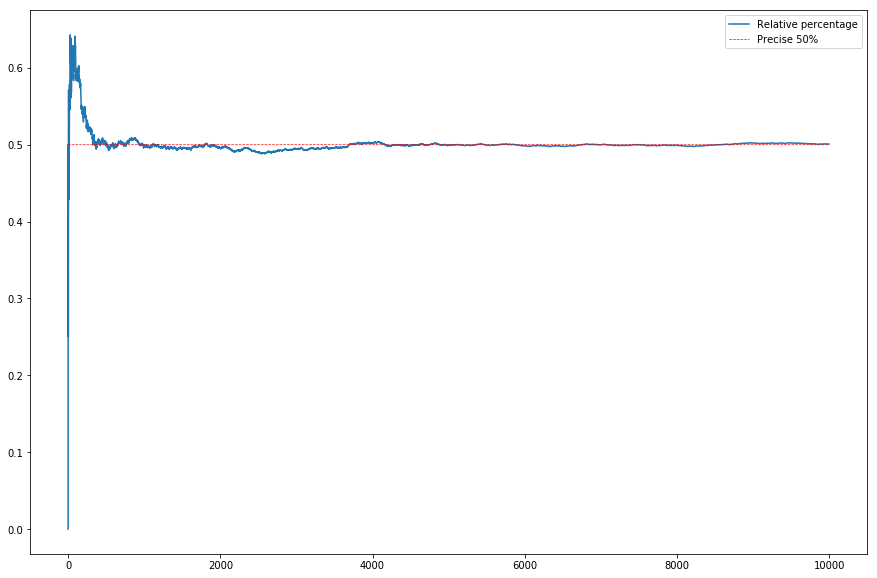

In [40]:
omega = (0, 1)

n = 10000
sample = list(np.random.choice(omega, size=n))

f = plt.gcf()
f.set_size_inches(15, 10)

probVSamt = np.array([sample[:i].count(1)/i for i in range(1, n)])
# print(probVSamt)

plt.plot(probVSamt, label="Relative percentage")
line = plt.plot([0.5 for i in range(1, n)], 'r--', linewidth=0.7, label="Precise 50%")
plt.legend()
plt.show()

## 2 Найбільше число
Реалізуйте функцію підрахунку точної (теоретичної) імовірності того, що максимальне число після $n$ кидків різних гральних кубиків із кількістю сторін $f = \{ f_i \}_{i = 1}^{n}$ дорівнює $x\_max$, для таких параметрів:
- $f = \{ 2, 5, 8 \}, x\_max = 8$
- $f = \{ 3, 4 \}, x\_max = 2$
- $f = \{ 2, 5, 7, 3 \}, x\_max = 3$

Тобто, якщо $X_i, i = 1, \ldots, n$, - число на $i$-му кидку кубика, а $X = \max\limits_{1 \leq i \leq n} X_i$, то потрібно знайти ймовірність $\textbf{P} \left( X = x\_max \right)$.

Підрахуйте також емпіричні ймовірності відповідних подій у випадку $10000$ симуляцій.

**Зауваження.** Якщо введені параметри не мають сенсу, то повертати $0$.
Наприклад, якщо при $f = \{ 4, 8, 3 \}$ вводиться $x\_max < 1$ або $x\_max > 8$.

In [67]:
from itertools import product

def theor1(lens: list, xMax):
    samples = [tuple(range(1, lens[i] + 1)) for i in range(len(lens))]
    allData = product(*samples)
    amt = 0
    total = 0
    for t in allData:
        total += 1
        if max(t) == xMax:
            amt += 1
    return amt/total

def empyric1(n, lens: list, xMax):
    amt = 0
    for i in range(n):
        sample = [np.random.randint(1, lens[i] + 1) for i in range(len(lens))]
        if max(sample) == xMax:
            amt +=1
    return amt / n



lens = ([2, 5, 8], [3, 4], [2, 3, 5, 7])
xMax = (8, 2, 3)
for l, x in zip(lens, xMax):
    print(f"lens: {l}, xMax: {x}")
    print("theor:", theor1(l, x))
    print("empyrical:", empyric1(10_000, l, x))




lens: [2, 5, 8], xMax: 8
theor: 0.125
empyrical: 0.1197
lens: [3, 4], xMax: 2
theor: 0.25
empyrical: 0.2499
lens: [2, 3, 5, 7], xMax: 3
theor: 0.18095238095238095
empyrical: 0.1852


## 3 Сума чисел
Реалізуйте функцію підрахунку точної (теоретичної) імовірності того, що сума чисел після $n$ кидків різних гральних кубиків із кількістю сторін $f = \{ f_i \}_{i = 1}^{n}$ дорівнює $s$, для таких параметрів:
- $f = \{ 3, 4, 5 \}, s = 13$
- $f = \{ 2, 2 \}, s = 3$
- $f = \{ 3, 4, 5 \}, s = 7$

Тобто, якщо $X_i, i = 1, \ldots, n$, - число на $i$-му кидку кубика, а $X = \sum\limits_{i = 1}^{n} X_i$, то потрібно знайти ймовірність $\textbf{P} \left( X = s \right)$.

Підрахуйте також емпіричні ймовірності відповідних подій у випадку $10000$ симуляцій.

**Зауваження.** Якщо введені параметри не мають сенсу, то повертати $0$.
Наприклад, якщо при $f = \{ 4, 6, 3 \}$ вводиться $s < 3$ або $s > 13$.

In [69]:
def theor2(lens: list, s):
    sample = tuple([tuple(range(1, lens[i] + 1)) for i in range(len(lens))])
    allData = product(*sample)
    total = 0
    amt = 0
    for t in allData:
        total += 1
        if sum(t) == s:
            amt += 1
    return amt/total

    
def empyric2(n, lens: list, s):
    amt = 0
    for i in range(n):
        sample = tuple([np.random.randint(1, lens[i] + 1) for i in range(len(lens))])
        if sum(sample) == s:
            amt += 1
    return amt/n


lens = ([3, 4, 5], [2, 2], [3, 4, 5])
sums = (13, 3, 7)

for l, s in zip(lens, sums):
    print(f"l: {l}, s: {s}")
    print("theoretical:", theor2(l, s))
    print("empyrical:", empyric2(10_000, l, s))









l: [3, 4, 5], s: 13
theoretical: 0.0
empyrical: 0.0
l: [2, 2], s: 3
theoretical: 0.5
empyrical: 0.5058
l: [3, 4, 5], s: 7
theoretical: 0.18333333333333332
empyrical: 0.1751
